# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2020
## Домашнее задание 2. Методы нахождения оценок
### Дедлайн --- 26 октября 9:00

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в <a href=https://docs.google.com/document/d/1kd85QRAS8fbxRxpMzP2IsbQ_YcVsU-Aczqd6ErXgIDg/edit#>этой папке</a>.

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде, 
* собственно кодом, 
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов, если не оговорено иного.

Загрузим все необходимые датасеты. Если что-то пошло не так, то просто скачайте файлы по ссылке вручную.

In [1]:
!pip install -q gdown
!gdown https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
!gdown https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs

Downloading...
From: https://drive.google.com/uc?id=1fMQ0H-_E4U25XHB2SH7ryoZPLG2MHlLQ
To: /home/archie/matstat_prac/Task2/Cauchy.csv
100%|██████████████████████████████████████| 18.7k/18.7k [00:00<00:00, 7.27MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cJywRii7wBZa0B2uAvvu56JFCLPnlOSs
To: /home/archie/matstat_prac/Task2/Weibull.csv
100%|██████████████████████████████████████| 17.9k/17.9k [00:00<00:00, 11.2MB/s]


In [2]:
import pandas as pd
import numpy as np
from scipy import stats as sps

from matplotlib import pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.4)

## Задача 1

На высоте 1 метр от поверхности Земли закреплено устройство,
которое периодически излучает лучи на поверхность Земли (считайте,
что поверхность Земли представляет из себя прямую). Пусть $l$ —
перпендикуляр к поверхности Земли, опущенный из точки, в которой
закреплено устройство. Угол к прямой $l$ (под которым происходит
излучение) устройство выбирает случайно из равномерного
распределения на от\-резке $\left(-\frac{\pi}{2}, \frac{\pi}{2}\right)$ (все выборы
осуществляются независимо). В этих предположениях точки пересечения
с поверхностью имеют распределение Коши с плотностью $p(x) =
\frac{1}{\pi(1 + (x-x_0)^2)}.$ Неизвестный параметр сдвига $x_0$
соответствует проекции точки расположения устройства на поверхность
Земли (направление оси и начало координат на поверхности Земли
выбраны заранее некоторым образом независимо от расположения
устройства). В файле Cauchy.csv находятся координаты точек
пересечения лучей с поверхностью Земли.

In [3]:
sample_1 = pd.read_csv("Cauchy.csv")["sample"].values

sample_1.shape

(1000,)

 Оцените параметр сдвига
методом максимального правдоподобия 
* по первым 10 измерениям
* по первым 100 измерениям
* по всей выборке. 

Оценку произведите по сетке (т.е. возьмите набор
точек с некоторым шагом и верните ту, на которой достигается
максимум функции правдоподобия). Известно, что параметр сдвига принадлежит интервалу $[-1000, 1000].$ Выберите шаг равным 0.01. Интервал можете итеративно уменьшать, но не стоит делать его длину меньше 50.


Распределение коши корректно в данном случае:

$\pi(U-\frac{1}{2}) \sim U(-\frac{\pi}{2}, \frac{\pi}{2})$ , где $U \sim U(0,1)$

Тогда $x_0 + \tan {\pi(U-\frac{1}{2})} \sim Cauchy(x_0, 1)$

In [4]:
# YOUR_CODE_GOES_HERE
x_0 = np.arange(-1000, 1000, 0.01)

def CauchyPdf(x, x_0):
    return 1 / (np.pi * (1 + (x-x_0)**2))

def CauchyMLE(grid, sample):    
    log_likelihood = np.array([np.log(CauchyPdf(sample, estimation)).sum() for estimation in grid])    
    return grid[log_likelihood.argmax()]

In [5]:
CauchyMLE(x_0, sample_1[:10])

208.52999999890085

In [6]:
CauchyMLE(x_0, sample_1[:100])

207.89999999890142

In [7]:
CauchyMLE(x_0, sample_1)

207.97999999890135

In [8]:
sps.cauchy.fit(sample_1)[0]

207.97772827944334

Сравните полученные результаты с `sps.cauchy.fit`

Видим что оценка полученная методом  `CauchyMLE` совпадает с библиотечной реализацией

## Задача 2
В банкомате "Тинькофф" в Новом Корпусе МФТИ каждую минуту подсчитывается баланс по
сравнению с началом дня (6 часов утра). В полночь работники банка
измеряют две величины: $X^1$ – максимальное значение баланса за
день, $X^2$ – значение баланса в полночь. Считается, что величина
$X = X^1 - X^2$ имеет распределение Вейбулла с функцией распределения $F(x) = 1 - e^{-x^\gamma} (x > 0),$ где $\gamma > 0$ –
параметр формы. В течение 10 лет каждый день банк проводил
измерение величины $X,$ получив в результате выборку $X_1, \ldots,
X_{3652}.$ В файле Weibull.csv находятся соответствующие измерения.

In [9]:
sample_2 = np.loadtxt("Weibull.csv")

sample_2.shape

(3652,)

Проведем небольшой предварительный анализ. Итак, если наши данные распределены согласно распределению Вейбулла, то справедливы следующие рассуждения:
$$
\begin{aligned} F(x) &=1-e^{-(x)^{\gamma}} \\-\ln (1-F(x)) &=x^{\gamma} \\ \underbrace{\ln (-\ln (1-F(x)))}_{y^{\prime}} &=\underbrace{\gamma \ln x}_{\text {kx }^{\prime}} \end{aligned}
$$
А значит и
$$
\underbrace{\ln (-\ln (1-\hat{F}(x)))}_{y^{\prime}} ≈\underbrace{\gamma \ln x}_{\text {kx }^{\prime}}
$$
Подсчитайте эмпирическую функцию распределения и 
$$y\prime = \ln (-\ln (1-\hat{F}(x))) \quad x' = ln x$$
 где $x$ – элементы исходной выборки. Постройте график (`plt.scatter`) выделив данные за первые четыре года красным цветом (`sample_2[:1461]`), остальные синим (`sample_2[1461:]`). Не забудьте про `alpha=0.05` и легенду. Такой график называется `Weibull plot` и является аналогом `qqplot` для распределения Вейбулла. 


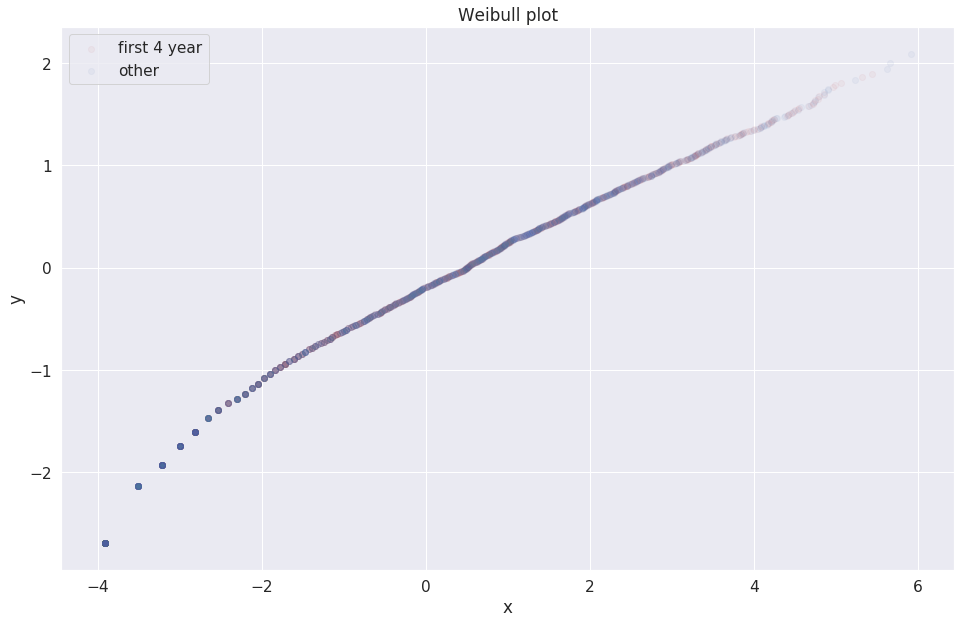

In [10]:
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')

# YOUR_CODE_GOES_HERE

# Видим что у нас есть нули в выборке, выкинем их 
# иначе мы будем натыкаться на логарифм нуля в методе максимального правдоподобия 
# и при построении Weibull plot'a
sample_2 = sample_2[sample_2 != 0]

ecdf = ECDF(sample_2, side="left")
x_weib = np.log(sample_2)
y_weib = np.log(-np.log(1-ecdf(sample_2)))

plt.figure(figsize=(16,10))
plt.scatter(x_weib[:1461], y_weib[:1461], color="r", alpha=0.05, label="first 4 year")
plt.scatter(x_weib[1461:], y_weib[1461:], color="b", alpha=0.05, label="other")

plt.legend()
plt.title("Weibull plot")
plt.xlabel("x")
plt.ylabel("y")

plt.show()

Сделайте вывод.

**Вывод**

Видно что график хорошо аппроксимируется прямой. Из этого можно сделать вывод, что данные хорошо описываются распределением Вейбулла.

Оцените параметр формы методом максимального правдоподобия 
* по
первым 4 годам; 
* по всей выборке.
Оценку произведите по сетке (в
логарифмической шкале). Известно, что $\log_{10}\gamma \in [-2, 2].$
Выберите шаг равным $10^{-3}.$

#### Плотность распределения вейбулла:

$$
p(x) = \frac{d}{dx} (1 - e^{-(x)^{\gamma}}) = \gamma x^{\gamma - 1} e^{-(x)^{\gamma}}
$$


In [11]:
# YOUR_CODE_GOES_HERE
log_gamma_grid = np.arange(-2, 2, step=1e-3)

def WeibullPdf(x, log_gamma):
    gamma = 10 ** log_gamma
    return gamma * x ** (gamma-1) * np.exp(-(x**gamma))

def WeibullMLE(grid, sample):
    log_likelihood = np.array([np.log(WeibullPdf(sample, estimation)).sum() for estimation in grid])
    return grid[log_likelihood.argmax()]

def plotGraph(gamma):
    plt.figure(figsize=(16,10))
    first_4 = plt.scatter(x_weib[:1461], y_weib[:1461], color="r", alpha=0.05, label="first 4 year")
    other = plt.scatter(x_weib[1461:], y_weib[1461:], color="b", alpha=0.05, label="other")
    fit = plt.plot(x_weib, gamma * x_weib, label = "y = {} * x".format(gamma))
    
    plt.title("Weibull plot")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()

    plt.show()

0.4139996748195607


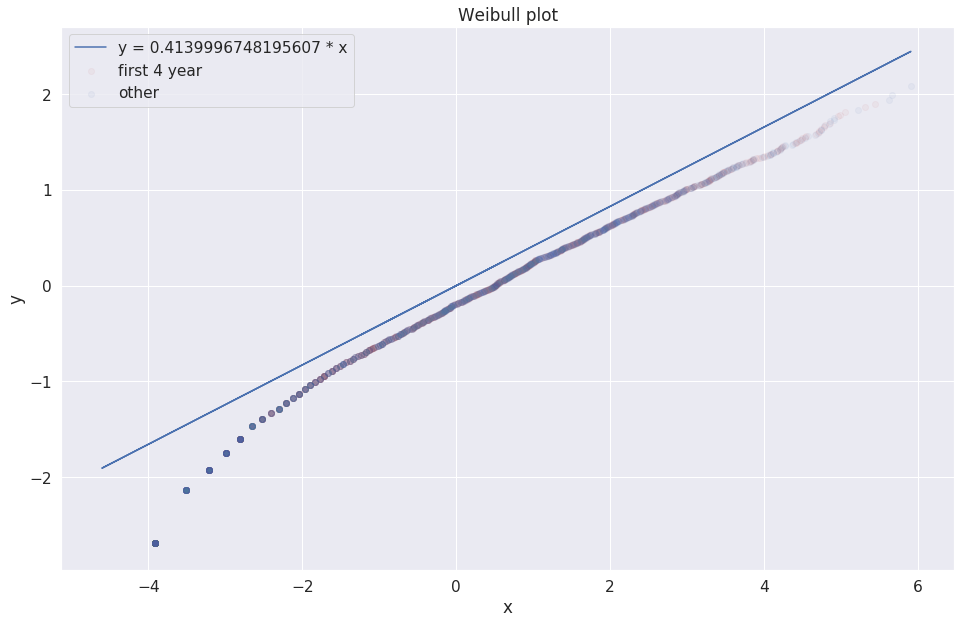

In [12]:
gamma = 10 ** WeibullMLE(log_gamma_grid, sample_2[:1461])
print(gamma)
plotGraph(gamma)

0.41020410298643906


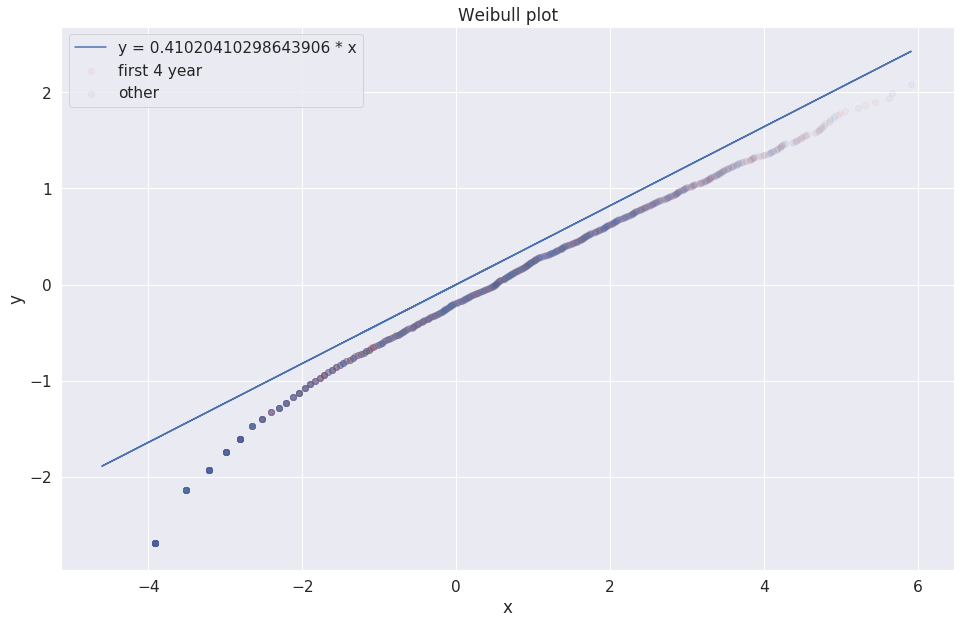

In [13]:
gamma = 10 ** WeibullMLE(log_gamma_grid, sample_2)
print(gamma)
plotGraph(gamma)

Сравните результаты с `sps.weibull.fit(sample_2, fscale=1, floc=0)`

0.41025390624999947


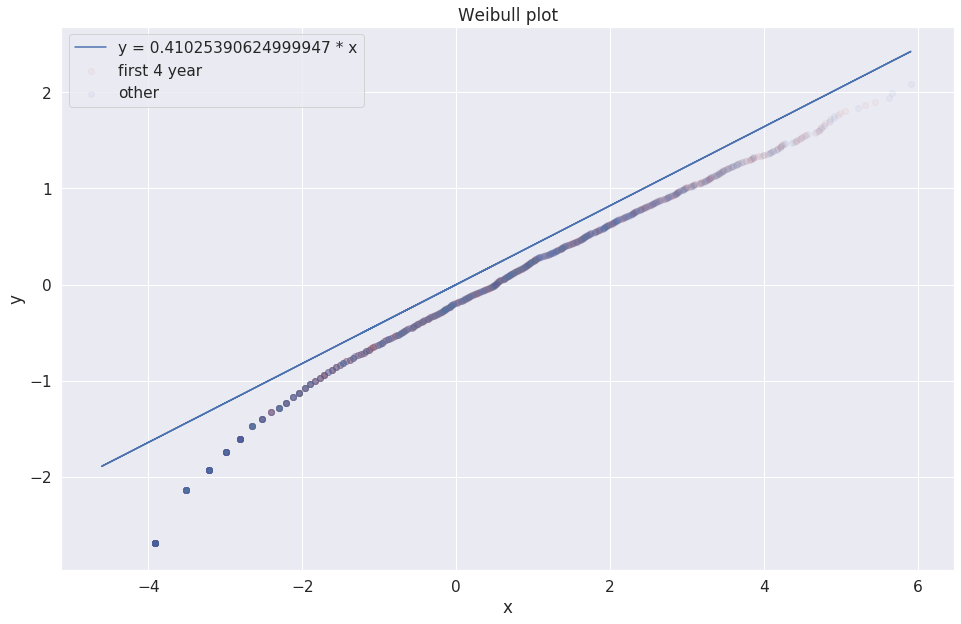

In [14]:
# YOUR_CODE_GOES_HERE
gamma = sps.weibull_min.fit(sample_2, fscale=1, floc=0)[0]
print(gamma)
plotGraph(gamma)

Постройте график $y = \gamma \cdot x$ для всех полученных $\gamma$ (`plt.plot`) и `scatter plot` из предыдущего пункта ($y\prime \ x\prime$). Хорошо ли линии соответствуют выборке? Как вы думаете, почему?

**Вывод**

Из линий графика $y = \gamma \cdot x$ можно убедиться, что оценка полученная MLE ялвяется состоятельной, но в то же время смещенной

## Задача 3

Сгенерируйте выборки $X_1, \ldots, X_N$ из $\mathit{N}(0, \theta)$, $U(0, \theta)$, $\Gamma(1, \theta)$ (**параметризация $k, \theta$**), $\theta = 3$ для всех распределений $(N = 1000).$ Для всех $n \leq N$ посчитайте значения оценок (по выборке $X_1, \ldots X_n$) методом моментов. Постройте график ошибки оценки от реального значения ($|\hat\theta - \theta|_{l_1}$) относительно размера выборки.

In [15]:
# YOUR_CODE_GOES_HERE
N = 1000
theta = 3

def plotErr(estimation, sample, label):
    estimates = estimation(sample)
    
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(1, N+1), np.abs(estimates-theta), label=label)
    
    plt.xlabel("sample size")
    plt.ylabel("Absolute error")
    plt.legend()
    
    plt.show()

#### Нормальное распределение

$$ 
N(0, \theta)
$$
$$
\theta = \mathsf{E} (x_i^2) = \overline{X_i^2}
$$

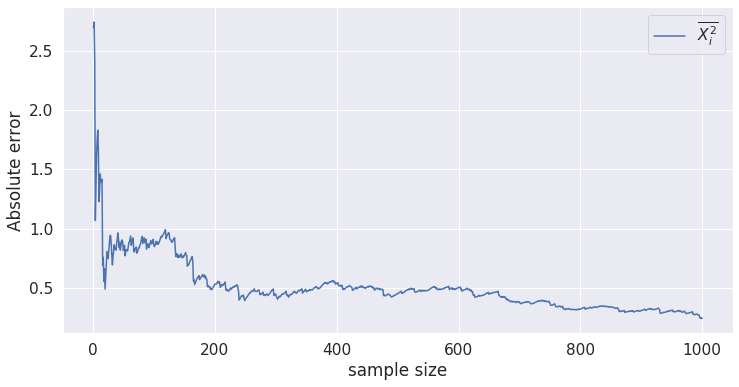

In [16]:
def NormEstimation(sample):
    return (sample ** 2).cumsum() / np.arange(1, len(sample)+1)

sample_norm = sps.norm.rvs(loc=0, scale=np.sqrt(theta), size=N)
plotErr(NormEstimation, sample_norm, "$\overline{X_i^2}$")

#### Равномерное распределение

$$
U(0, \theta)
$$
$$
\frac{\theta}{2} = \mathsf{E} (x_i) = \overline{X_i}
$$
$$
\theta = 2\overline{X_i}
$$

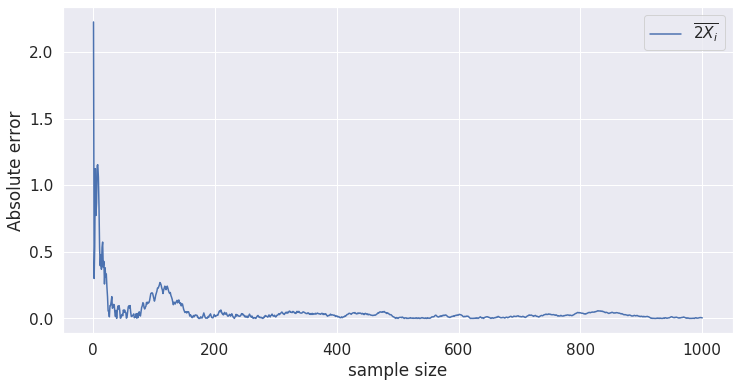

In [17]:
def UniformEstimation(sample):
    return 2 * sample.cumsum() / np.arange(1, len(sample)+1)

sample_uniform = sps.uniform.rvs(loc=0, scale=theta, size=N)
plotErr(UniformEstimation, sample_uniform, "$\overline{2X_i}$")

#### Гамма распределение

$$
\Gamma(1, \theta)
$$

$$
\theta = \mathsf{E} (x_i) = \overline{X_i}
$$

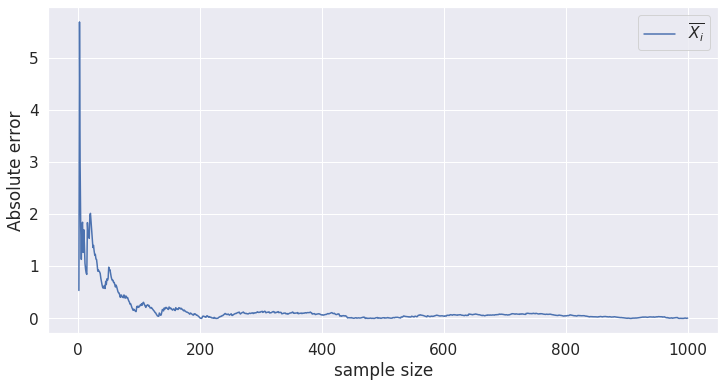

In [18]:
def GammaEstimation(sample):
    return sample.cumsum() / np.arange(1, len(sample)+1)

sample_gamma = sps.gamma.rvs(a=1, loc=0, scale=theta, size=N)
plotErr(GammaEstimation, sample_gamma, "$\overline{X_i}$")

#### Вывод:
- Видим , что все оценки состоятельны. Оценка для нормального распределения $N(0, \theta)$ полученная методом моментов оказалась смещенной

### Бутстреп

Для реальных данных часто сложно подобрать распределение и нужную параметризацию относительно $\theta$. Кроме того на практике сложно посчитать дисперсию оценки (для этого хотя бы нужно знать распределение, из которого пришла выборка). На помощь в таких случаях приходит **бутстреп**.

Идея очень простая. Давайте возьмем нашу выборку размера $N$ и сгенерируем из нее еще $K$ выборок. Более формально для каждой бутстрепной выборки N раз будем выбирать элементы из исходной выборки с возвращением. Полученная таким образом выборка будет содержать $\approx 63$% уникальных элементов, но это не страшно. Для всех $K$ выборок посчитаем оценку $\hat\theta$. Таким образом мы получим $K$ оценок параметра. Можно показать, что если размер бутстрепных выборок и исходной совпадают, то оценка дисперсии $s^2(\hat\theta)$, полученная из $K$ оценок, будет *хорошей*.

Для каждого распределения из предыдущего пункта (Пожалуйста, не пишите цикл по распределениям. Сделайте три отдельные ячейки) для каждого $K$ из `[10] + [50] + list(range(100, 1001, 100))` сгенерируйте K бутстрепных выборок и посчитайте дисперсию бутстрепных оценок и посчитайте среднее по K выборкам. Размер бутстрепной выборки сделайте равным $K$, незабудьте уменьшить размер исходной выборки до $K$. Постройте график следующим образом: по оси $x$ отложите значения $K$, красной линией обозначьте среднее значение $\hat\theta$ бутстрепных выборок для каждого $K$. Посчитайте стандартное отклонение оценки для каждого $K$ и закрасьте интервал $\mu(k) \pm \sigma(\hat\theta)$ (`plt.fillbetween`).



In [19]:
# YOUR_CODE_GOES_HERE
K = [10] + [50] + list(range(100, 1001, 100))
print(K)

def RunBootstrap(sample, estimation, title, label):
    mean_estimates = np.zeros(len(K))
    mean_estimates_std = np.zeros(len(K))
    
    for i in range(len(K)):
        # random subarray of size K, to generate bootstrap
        Init = np.random.choice(sample, size=K[i], replace=False)
        # estimates on bootstraped samples
        estimates = np.array([estimation(np.random.choice(Init, size=K[i]))[-1] for _ in range(K[i])])
        
        mean_estimates[i] = np.mean(estimates)
        mean_estimates_std[i] = np.std(estimates)
    
    plt.figure(figsize=(16, 10))
    plt.plot(K, mean_estimates, label=label)
    plt.fill_between(
        x=K, 
        y1=mean_estimates + mean_estimates_std,
        y2=mean_estimates - mean_estimates_std,
        alpha=0.15
    )
    
    plt.xlabel("Bootstrap size")
    plt.ylabel("Mean estimation")
    plt.title(title)
    plt.legend()
    
    plt.show()

[10, 50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]


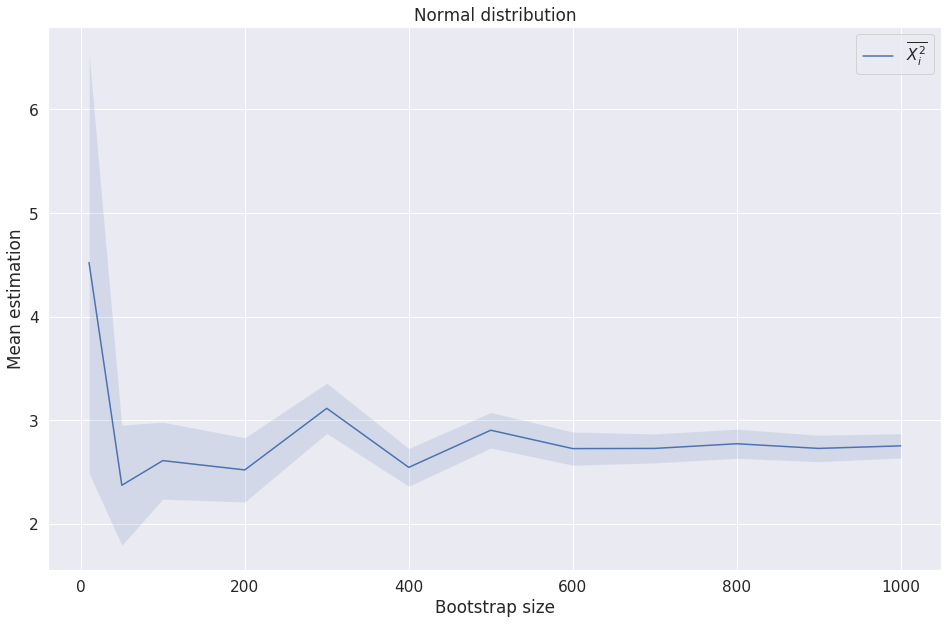

In [20]:
RunBootstrap(sample=sample_norm, estimation=NormEstimation, title="Normal distribution", label="$\overline{X_i^2}$")

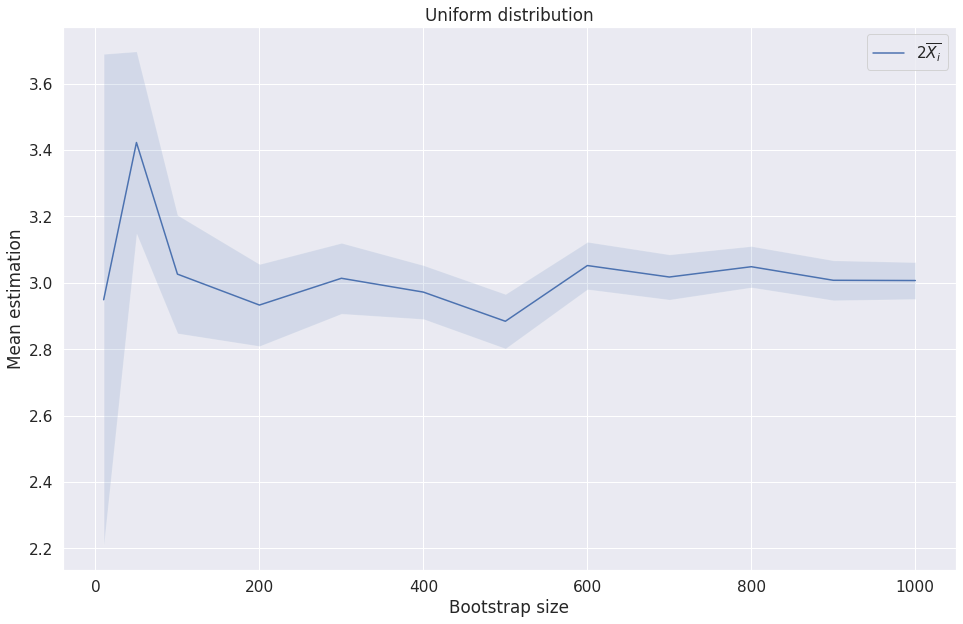

In [21]:
RunBootstrap(sample=sample_uniform, estimation=UniformEstimation, title="Uniform distribution", label="$2 \overline{X_i}$")

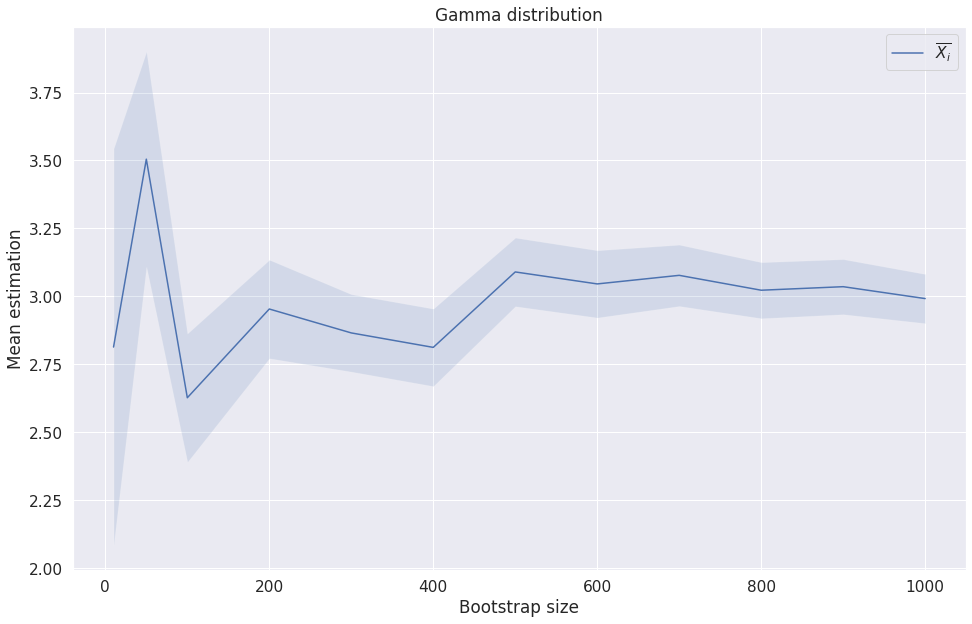

In [22]:
RunBootstrap(sample=sample_gamma, estimation=GammaEstimation, title="Gamma distribution", label="$\overline{X_i}$")

#### Вывод:
 
Пусть наша оценка $\theta$ - случайная величина 

Тогда, $\hat\theta = \frac{\sum_i^{K} \theta_i}{K}$ будет иметь дисперсию в K раз меньше $\sigma(\hat\theta) = \frac{\sigma(\theta)}{K}$ в предположении о том, что $\theta_i$ независимые случайные величины (такое предположение нам позволяет сделать сам механизм бутстрепа)

Как раз на графиках видно что дисперсия уменьшается с ростом К